In [1]:
from transit_model import TransitModel

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


##### Running transit and rotation fit from scratch

In [2]:
ID = 3654950

lc_path = './test_lightcurves/'
plot_path = './test_plots/'

tm = TransitModel(f'KIC {ID}')

## Download all will download and stitch all of the quarters, rather than using only the first found
# tm = TransitModel(f'KIC {ID}', download_all=True)

tm.fit_model_period()

## fit_model_period() can take a list of period guesses
## In this case, aliases of the initial period estimate
# bls_period = tm.estimate_period()
# period_guesses = [tm.bls_period/2, 2/3 * tm.bls_period, tm.bls_period, tm.bls_period*2]
# tm.fit_model_period(period_guesses=period_guesses)

## fit_model_window() fits for both period and the window parameter for lk's flattening function
# windows = [10*n+1 for n in range(1,11)]
# tm.fit_model_window(period_guesses=period_guesses, windows=)

tm.est_duration()
tm.est_eccentricity()
tm.apply_transit_mask()
tm.save_masked_lcs(lc_path, sigma_clip=3)
tm.fit_rotation()

C:\Users\Peter\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 11 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


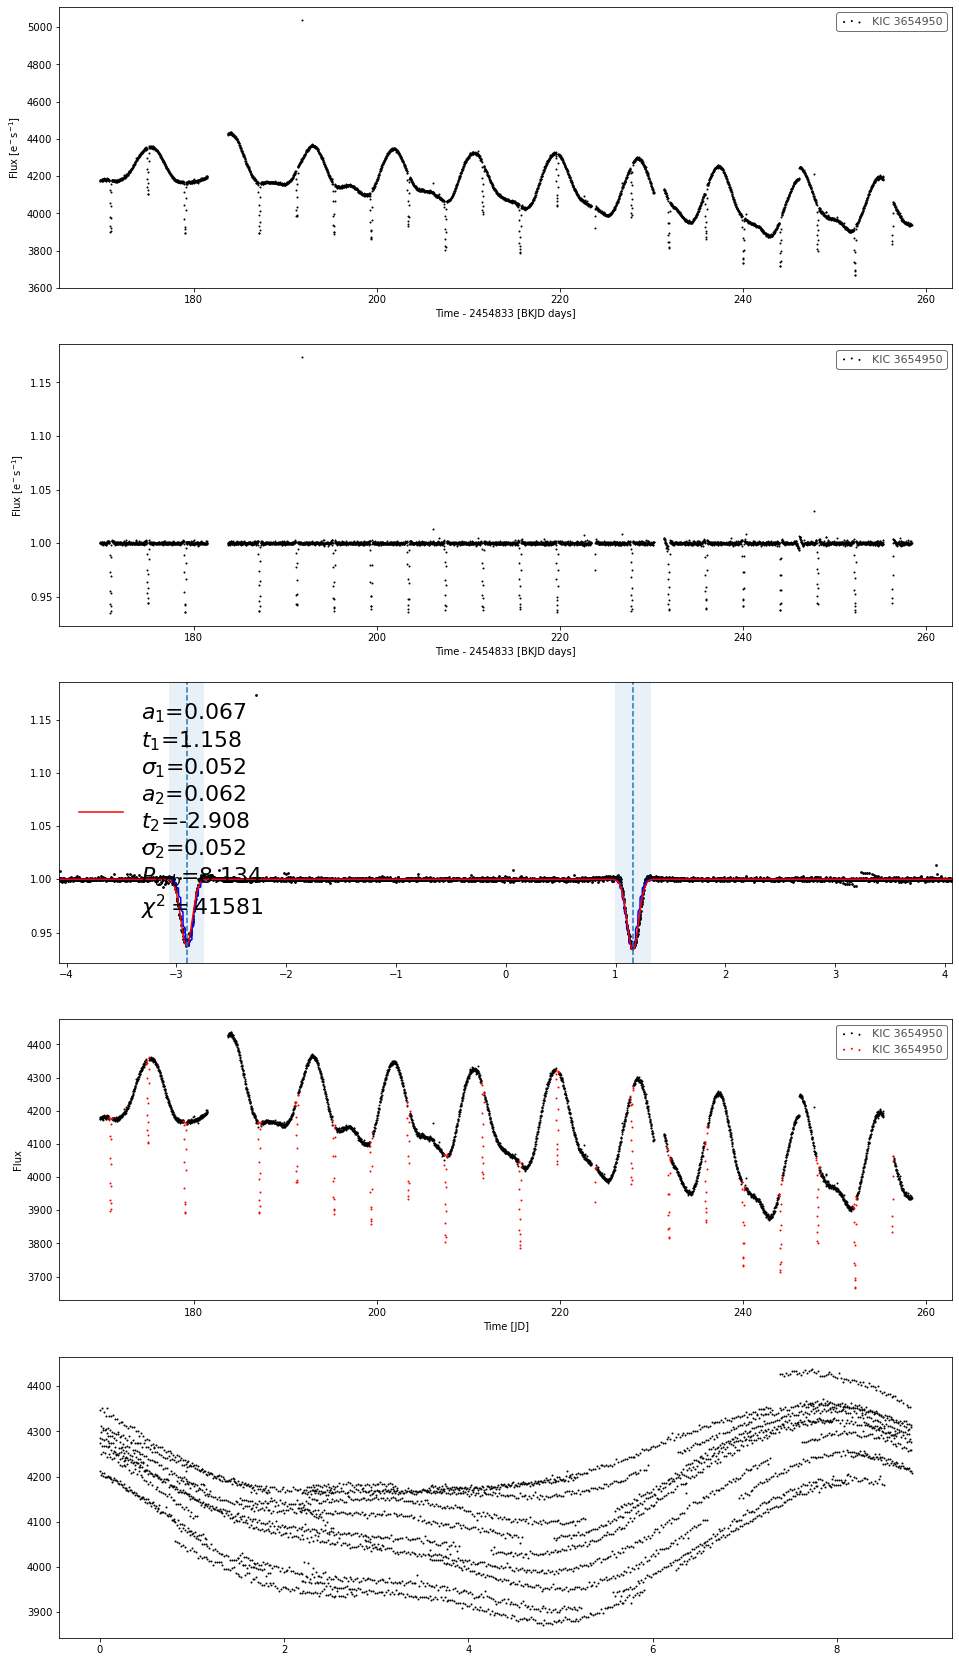

In [3]:
# Comment out lines 8 to 11 in transit_model.py if you get a LaTeX error
tm.plot_best_fit(save_dir=plot_path)

In [4]:
summary = tm.model_fit_summary()
print(f'P rot: {tm.prot:0.3f} days')
print()
print(summary)

P rot: 8.817 days

{'KICID': 'KIC 3654950', 'window': 51, 'dur1': 0.32291763662861284, 'dur2': 0.32198969181442294, 'ecosw': -0.00037606055107047923, 'esinw': -0.0014388808643723552, 'ecc': 0.0014872120494160773, '$P_{rot}$': 8.816754250179656, '$a_1$': 0.06659519967057828, '$t_1$': 1.1575905347112065, '$\\sigma_1$': 0.052248116749038495, '$a_2$': 0.06229423265948198, '$t_2$': -2.907704599136961, '$\\sigma_2$': 0.052097975154126994, '$P_{orb}$': 8.134485182559894}


##### Example how to iterate over a list of targets

In [5]:
# import pandas as pd

# ID_list = [3654950, ..., ..., ...]

# lc_path = './test_lightcurves/'
# plot_path = './test_plots/'

# summaries = []

# for ID in ID_list:
#     tm = TransitModel(f'KIC {ID}', download_all=False)
#     tm.fit_model_period()
#     tm.est_duration()
#     tm.est_eccentricity()
#     tm.apply_transit_mask()
#     tm.save_masked_lcs(lc_path)
#     tm.fit_rotation()
#     tm.plot_best_fit(show=False, save_dir=plot_path)

#     summaries.append(tm.model_fit_summary())
    
# df = pd.DataFrame(summaries)